# "Voices Heard" Data Analysis

Task Overview: Use ```Reports``` textual data to predict ```Genre```.
Method: TF-IDF, SVD

Model Workflow:
* Textual Preprocessing
* Vectorization
* TF-IDF
* Classification

## I. Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv("data/voicesHeard.csv")
df.head()

,Genre,Reports,Age,Gpa,Year,Count,Gender
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F


In [5]:
labelCodes = {l:i for i, l in enumerate(df["Genre"].astype("category").cat.categories.tolist())}
df["Genre"] = df["Genre"].apply(lambda x: labelCodes[x]).astype("int64")
df["Reports"] = df["Reports"].astype("string")
df = df[["Genre", "Reports"]]
df

,Genre,Reports
0,0,The limited access to research databases and m...
1,0,I'm having trouble finding the course material...
2,0,It's frustrating to have limited access to res...
3,0,I'm really struggling in one of my classes but...
4,0,I am really struggling with understanding the...
...,...,...
1000,5,26. I have been unable to find food that meets...
1001,5,27. I have been unable to find food that I can...
1002,5,28. I have been unable to find food that I enjoy.
1003,5,29. I have been unable to find food that is he...


In [6]:
sample = df.iloc[0, 1]
print(sample)

The limited access to research databases and materials is causing a lot of frustration among students. We need better access to be able to succeed academically.


In [7]:
def tokenize(text: str) -> list:
    """Transform a string of text into a list of word tokens, all lowercase. We desregard punctuation, numeric characters, and stopwors."""
    tkns = [t.lower() for t in word_tokenize(text)]

    punc = [str(s) for s in string.punctuation]
    numer = [str(s) for s in string.digits]

    stops = stopwords.words("english")

    tkns = [t for t in tkns if t not in punc + numer + stops]
    return tkns

In [8]:
tokenize(sample)

['limited',
 'access',
 'research',
 'databases',
 'materials',
 'causing',
 'lot',
 'frustration',
 'among',
 'students',
 'need',
 'better',
 'access',
 'able',
 'succeed',
 'academically']

In [9]:
X = df["Reports"]
y = df["Genre"]

report_train, report_test, genre_train, genre_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=tokenize)),
    ('tfidf', TfidfTransformer()),
    ('classifier', LinearSVC()),
])

In [11]:
pipeline.fit(report_train, genre_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function tokenize at 0x00000229AB0E0EE0>)),
                ('tfidf', TfidfTransformer()), ('classifier', LinearSVC())])

In [15]:
pred = pipeline.predict(report_test)

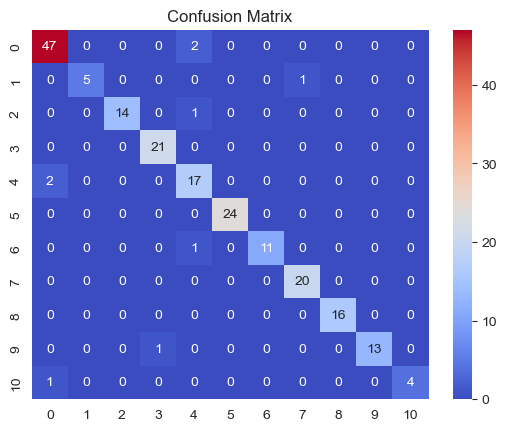

In [16]:
sns.heatmap(confusion_matrix(genre_test, pred), annot=True, cmap="coolwarm")
plt.title("Confusion Matrix")
plt.show()

In an ideal scenario, each off-diagonal entry is zero, meaning no entries were misclassified. Here, our off-diagonal entries are fairly low, so we'll take that as a good sign. Let's take a look at the classification report.

In [14]:
print(classification_report(pred, genre_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.83      1.00      0.91         5
           2       0.93      1.00      0.97        14
           3       1.00      0.95      0.98        22
           4       0.89      0.81      0.85        21
           5       1.00      1.00      1.00        24
           6       0.92      1.00      0.96        11
           7       1.00      0.95      0.98        21
           8       1.00      1.00      1.00        16
           9       0.93      1.00      0.96        13
          10       0.80      1.00      0.89         4

    accuracy                           0.96       201
   macro avg       0.93      0.97      0.95       201
weighted avg       0.96      0.96      0.96       201



We managed to score 96% accuracy when predicting the ```Genre``` of a complaint given the textual data of ```Report```. We did not need to engage in Stemming or Lemmatization.